In [60]:
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt
from MNinv import MNinv
from MSinv1 import MSinv
%matplotlib inline

In [61]:
print('2D gravity inversion')
gamma=6.67*1e-4     # % gravity constant*10^7
#% domain (in meters)
print('Setting the domain');
X=1000              # % width of the domain
Z=250               # % height of the domain 
Zmin=25             # % depth to the upper boundary of the domain

Nx=50
hx=X/Nx             # % number of cells and size of the cells
Nz=10
hz=Z/Nz 

Nd=50               # % number of measurements and distance between measurements
hs=X/Nd             

#% coordinates of the mesh
xx=np.linspace(hx/2,1000-hx/2,Nx)          # % points of this grid are in the middle of each cell
zz=np.linspace(Zmin+hz/2,Z+Zmin-hz/2,Nz)   # % for more accurate using of rectangular method
xs=np.linspace(0,X,Nd);
Nm=Nx*Nz
print('Setting the model')
dens=np.zeros((Nx,Nz))                     # %  true density  in 10*g/cc
dens[15:19,4:7]=5 


2D gravity inversion
Setting the domain
Setting the model


In [62]:
print('Computation of the forward problem matrix');
A=np.zeros((Nd,Nm))  #      % matrix of the forward problem
[xk,zk]=np.meshgrid(xx,zz)
for i in range(Nd):
   A[i,:]=2*gamma*hx*hz*( zk.flatten()/((xs[i]-xk.flatten())**2+zk.flatten()**2))

# Compute "measured" data
d=np.dot(A,dens.T.flatten()) #  % "measured" data
#%d=d+0.05*(rand(Nd,1)-0.5).*d;  % adding 5% noise
#%disp('Noise 5% added');


Computation of the forward problem matrix


In [63]:
print('Computation of weighting matrix')
Wm=np.sqrt(np.sqrt(np.sum(A**2,axis=0))).T  #  % weighting matrix
mapr=np.zeros(Nm)
m=np.zeros(Nm)
# %-----------------------------------------------------
eps=0.00000001   #   % stop criteria - misfit < eps
SmoothNit=30     #   % number of iterations for smooth inversion
q=0.5            #   % relaxation parameter for alpha
                 #   % focusing parameter
ml=-0.01*np.ones(Nm)   # %-0.01      % m low - lower density constrain
mu=5*np.ones(Nm)       # % 5       % m upper - upper density constrain
#%  run smooth inversion
m0, x, al, P, S, I=MNinv(A,Wm,d,mapr,mapr,mu,ml,eps,q,SmoothNit)

Computation of weighting matrix
Starting smooth inversion...
alpha= 0.8616705961546057
iteration 1 , misfit= 192.19994829321016 , functional= 192.19994829321016
iteration  3 , misfit= 24.250273516976208 , functional= 29.926979415583013
iteration  4 , misfit= 16.206622042423366 , functional= 21.29713670724876
iteration  5 , misfit= 15.954114764798934 , functional= 20.802073203392208
iteration  6 , misfit= 12.556072451046246 , functional= 15.809105582228018
iteration  7 , misfit= 10.538988256653873 , functional= 12.87243266205681
iteration  8 , misfit= 9.955935934566044 , functional= 12.033520553984731
iteration  9 , misfit= 9.319704698403084 , functional= 11.310203599942238
iteration  10 , misfit= 7.879051795902711 , functional= 9.82369882752493
iteration  11 , misfit= 4.951741004140583 , functional= 6.6194893370432135
iteration  12 , misfit= 1.7914167610856435 , functional= 2.8286118228910766
iteration  13 , misfit= 0.3478185402171234 , functional= 0.8575710422386931
iteration  14 , mi

In [64]:
m0[m0<0]=0
e=0.0009;
MSNit=50          #   % number of iterations for Minimum Support inversion
#run Minimum Support inversion
#    % to use zero first iteration, do m0=m0*0;
me, x, al, P, S, I=MSinv(A,Wm,d,m0,mapr,mu,ml,eps,q,e,MSNit,Nz)

Starting MS inversion...
iteration  0 , misfit= 0.4819421213358869 , functional=%f 0.415275355003509
iteration  0 , misfit= 0.024336628533993074 , functional= 0.6114027072236274
iteration  1 , misfit= 0.006569317957872994 , functional= 0.5629214622015372
iteration  2 , misfit= 0.10027099126757068 , functional= 0.7114524052714001
alpha= 0.00028338766658413556
I made  2  iterations to find focused solution, misfit/norm(d)= 0.10027099126757068
iteration  3 , misfit= 0.009996996241623748 , functional= 0.28618442774979613
iteration  4 , misfit= 0.010274492943019842 , functional= 0.27195634451896933
iteration  5 , misfit= 0.010670820544325619 , functional= 0.2710177623709133
iteration  6 , misfit= 0.17179501774506167 , functional= 0.5653201701614616
alpha= 0.00014169383329206778
I made  6  iterations to find focused solution, misfit/norm(d)= 0.17179501774506167
iteration  7 , misfit= 0.014575392315775702 , functional= 0.14526936178327718
iteration  8 , misfit= 0.01151013400414866 , functiona

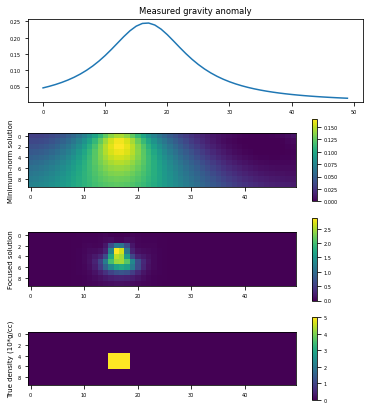

In [65]:
plt.figure(figsize=(6,7)) 
matplotlib.rc('font', size=7) 
plt.subplot(4,1,1)
plt.plot(d)
plt.title('Measured gravity anomaly')
plt.subplot(4,1,2)
plt.imshow(np.reshape(m0,(Nz,Nx)))
plt.ylabel('Minimum-norm solution')
plt.colorbar()
plt.subplot(4,1,3)
plt.imshow(np.reshape(me,(Nz,Nx)))
plt.ylabel('Focused solution')
plt.colorbar()
plt.subplot(4,1,4)
plt.imshow(dens.T)
plt.ylabel('True density (10*g/cc)')
plt.colorbar()